<a href="https://colab.research.google.com/github/Lebengeniesser/Pytorch_Practice/blob/master/PyTorch(Quickstart).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


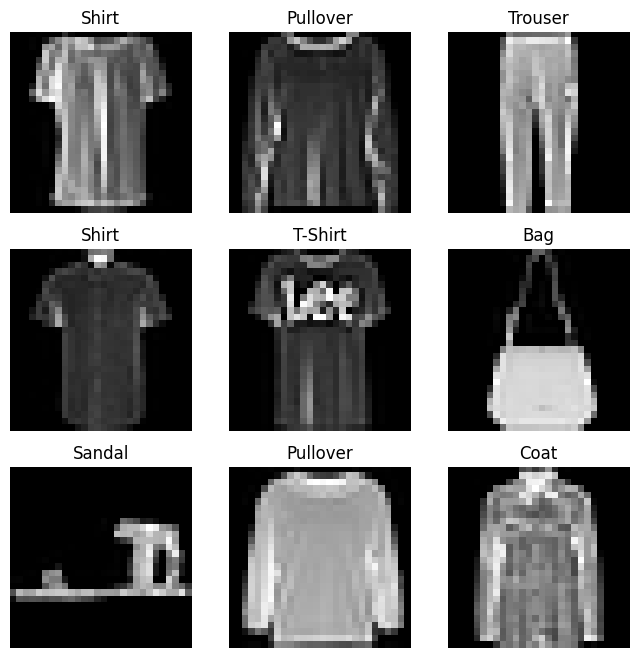

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


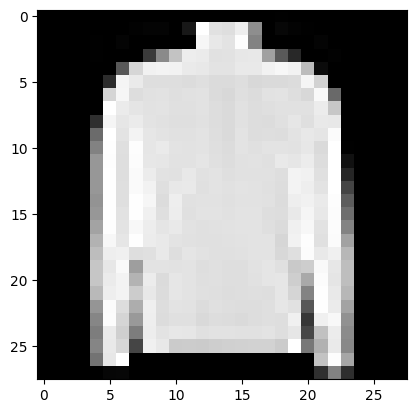

Label: 4
Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([8])
torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[-0.5193,  0.3443, -0.1484, -0.3908,  0.1234,  0.0301,  0.7435, -0.2376,
          0.2494, -0.0596,  0.3384, -0.3578,  0.2040,  0.0819,  0.1148,  0.5697,
          0.1205, -0.0123, -0.1776,  0.2152],
        [-0.3894,  0.3743,  0.0725, -0.0425,  0.0649,  0.1005,  0.8001, -0.3874,
          0.2900, -0.1510,  0.4550, -0.2099,  0.2669,  0.2727, -0.0369,  0.4292,
         -0.1033, -0.1828, -0.6834,  0.0025],
        [-0.2732,  0.0977, -0.1594, -0.2975,  0.0160, -0.0677,  0.8846, -0.1878,
          0.0701, -0.4734,  0.5831,  0.0201,  0.018

In [87]:
seconds_in_a_day = 24 * 60 *60
seconds_in_a_day
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week
#Pytorch 데이터 작업하기
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

 #공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
#데이터셋을 순회하고 시각화하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#파일에서 사용자 정의 데이터셋 만들기
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, naems=['fill_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
    #init함수는 Dataset객체가 생성되때 한번만 실행된다.

  def __len__(self):
    return len(self.img_labels)
#len 함수는 데이터셋의 샘플 개수를 반환한다.
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_imgae(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(imgae)
    if self.target_transform:
      label = self.target_trandsform(label)
    return image, label
#getitem함수는 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.  
#===============================================
#DataLoader로 학습용 데이터 준비하기
from torch.utils.data import DataLoader
#DataLoader는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회(객체화) 가능한 객체이다.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#이미지와 라벨을 표시한다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") #Feature batch shape: torch.Size([64, 1, 28, 28]) 사이즈가28 x 28이다.
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#모델 만들기
#PyTorch에서 신경망 모들은nn.Module을 상속받은 클래스를 생성하여 정의한다. __init__함수에서 신경망의 계층(layer)들을정의하고
#forward함수에서 신경망에 데이터를 어떻게 전달할지 지정한다. 가능한 경우 GPU로 신경망을 이동시켜 연산을 가속(accelerate)한다.


#학습을 위한 장치 얻기
#가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려고한다. torch.cuda를 사용할 수있는지확인하고
#그렇지 않으면 CPU를 계속 사용한다.
device = "cuda" if torch.cuda.is_available() else "cpu" #지금은 cpu사용 gpu없다는 소리
print(f"Using {device} device")

#모델을 정의한다.(클래스 정의하기)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

#신경망은 데이터에 대한 연산을 수행하는 계층/모듈로 구성되어 있다.
import os
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#모델을 사용하기 위해 입력 데이터를 전달한다. 이는 일부 백그라운드 연산들과 함께 모델의 forward를 실행한다.
#model.forward()호출 하지 말기
#모델에 입력을 전달하여 호출하면 2차원 텐서를 반환한다. 2차원 텐서의 dim=0은 각 분류에 대한 행 예측값 10개가, dim=1에는
#각 출력의 개별 값들이 해당합니다. 원시 예측값을 nn.Softmax모듈의 인스턴스에 통과시켜 예측확률을 얻는다.
#torch는 클레스이며 그 안에 tensor라는 배열이나 행렬과 매우 유사한 특수한 자료구조이다.
#텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 매개변수를 부호화(encode)합니다.
X = torch.rand(1, 28, 28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

#모델 계층(Layer)

input_image = torch.rand(3, 28,28)
print(input_image.size())

#nn.Flatten  계층을 초기화하여 각 28x28의 2D 이미지를 784픽셀 값을 갖는 연속된 배열로 변환합니다.
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

#nn.Linear 선형 계층은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈이다.
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

#nn.ReLu 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만든다.
#비선형 활성화는 선형 변환 후에 적용되어 비선형성을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕닌다.
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1) #원래 hidden1비선형이엉서 ReLU에 입력으로 한다는 의미 
print(f"After RELU: {hidden1}")#들어갔다 나온 것

#nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다.
#순차 컨테이너(sequentioal container)를 사용하여 아래의 seq_modules와 같은 신경망을 빠르게 만들수 있다.

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

#nn.Softmax 신경망의 마지막 선형 계층은 nn.Softmax모듈에 전달될 ([-infty, infty]범위의 원시 값(raw value)인) logits를 반환한다.
#logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록[0,1]범위로 비례하여 조정(scale)된다. dim 매개변수는 값의 합이 1이 되는 차원을 나타낸다.
softmax = nn.Softmax(dim =1)
pred_probab = softmax(logits)

#모델 매개변수
#신경망 내부의 많은 계층들은 매개변수화된다. 즉, 학습 중에 최적화되는 가중치와 편향과 연관지어 진다.
#nn.Module 을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적되며, 모델의 parameters()및 named_parameters()메소드로 
#모든 매개변수에 접근 할 수있다.
print(f"Model structure: {model}\n\n")
for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}\n")

#모델 매개변수 최적화하기
#모델을 학습하려면 손실함수(loss function)와  옵티마이저(optimizer)가 필요하다.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

#각 학습 단계(training loop)에서 모델은 (배치(batch)로 제공되는) 학습 데이터셋에 대한 예측을 수행하고, 예측 오류를 역전파하여 모델의 매개변수를 조정한다.
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    #역전파: 다시 돌아와 매개변수를 조정하기 위함
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
#모델이 학습하고 있는지를 확인하기 위해 테스트 데이터셋으로 모델의 성능을 확인한다.
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0,0
  with torch.no_grad():
    for X, y in dataloader:
      X,y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")      
#학습단계는 여러번의 반복단계(에폭epochs)  를 거쳐서 수행된다. 각 에폭에서는 모델은 더 나은 예측을 하기 위해 매개변수를 학습한다.
#각 에폭마다 모델의 정확도와 손실을 출력한다.; 에폭마다 정확도가 증가하고 손실이 감소하는 것을 보려고 한다.

epochs =5
for t in range(epochs):
  print(f"Epoch {t+1}\n---------------------")
  test(test_dataloader, model, loss_fn)
print("Done!")

#모델매개변수 최적화하기 심화
#데이터에 매개변수를 최적화하여 모델을 학습하고, 검증하고, 테스트할 차례입니다.
#매개변수에 대한 오류의 도함수를 수집한 뒤, 경사하강법을 사용하여 이 파라미터들을 최적화한다.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

#하이퍼파라미터(Hyperaparameter)
#에폭(epoch)수 - 데이터셋을 반복하는 횟수
#배치 크기(batch size)- 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수
#학습률(learning rate) - 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을 수록 학습속도가 느려지고, 값이 므녀 학습 중 예측할 수 없는 동작이 발생할 수 있습니다.
learning_rate = 1e-3
batch_size = 64
epochs=5

#최적화 단계(Optimization Loop)
#하이퍼파라미터를 설정한 뒤에는 최적화 단계를 통해 모델을 학습하고 최적화 할 수 있습니다.
#하나의 에폭은 다음 두 부분으로 구성된다.
#학습단계(train loop)- 학습용 데이터셋을 반복하고 최적의 매개변수로 수렴한다.
#검증/테스트 단계(validation/test loop) - 모델 성능이 개선되고 있는지를 확인하기 위한 테스트 데이터셋을 반복한다.
#손실함수(loss function)
#학습용 데이터를 제공하면, 학습되지 않은 신경망은 정답을 제공하지 않을 확률이 높다. 손실함수는 획득한 결과와
#실제값 사이의 틀린 정도를 측정하며, 학습 중에 이값을 최소화하려고 한다. 예측과 정답을 비교하여 손실을 계산한다.
#모델의 출력 로짓을 nn.CrossEntropyLoss에 전달하여 로짓을 정규화하고 예측 오류를 계산한다.
#손실 함수를 초기화한다.
loss_fn = nn.CrossEntropyLoss()

#옵티마이저(Optimizer)
#최적화는 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정하는 과정이다.
#최적화 알고리즘은 이 과정이 수행되는 방식을 정의한다.SGD(Stochastic Gradient Descent); 확률적 경사하강법
#모든 최적화 절차는 optimizer객체에 캡슐화(encapsulate)된다.
#학습하려는 모델의 매개변수와 학습률 하이퍼파라미터를 등록하여 옵티마이저를 초기화 한다.
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#학습 단계(loop)에서 최적화는 세단계로 이뤄진다.:
#1. optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 재설정한다. 중복 계산을 막기위해 반복할때마다 명시적으로 0으로 설정한다.
#2. loss.backwards()를 호출하여 예측손실을 역전파 한다. 파이토치는 각 매개변수에 대한 손실의 변화도를 저장
#3. 변화도를 계산한 뒤에는 optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
# 손실 함수와 옵티마이저를 초기화하고 train_loop와 test_loop에 전달. 모델의 성능 향상을 아아보기 위해 자유롭게 에폭수를 증가시켜 볼수있음.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")
